In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_absolute_percentage_error

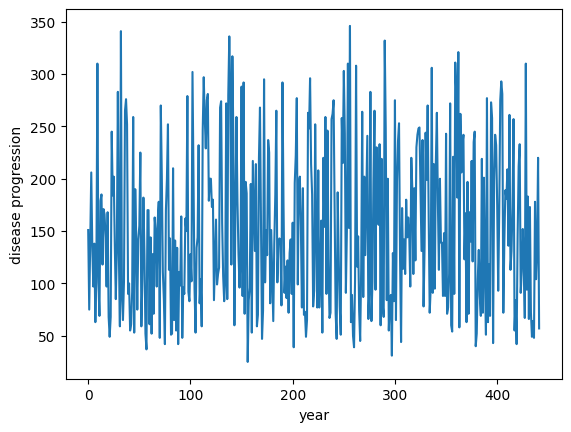

In [2]:
# Cargar el dataset de Diabetes
data = load_diabetes()
X = data.data  # Características (10 variables)
y = data.target  # Variable objetivo (progresión de la diabetes)

#variable a estimar
plt.figure()
plt.plot(y)
plt.ylabel("disease progression")
plt.xlabel("year")
plt.show()

In [3]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Crear el modelo de red neuronal multicapa (MLP) para regresión
'''
model = Sequential([
    Dense(20, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta con 64 neuronas
    Dense(10, activation='relu'),  # Otra capa oculta con 64 neuronas
    Dense(1, activation='linear')  # Capa de salida para regresión (1 valor continuo)
])

# Compilar el modelo
model.compile(optimizer=Adam(),
              loss='mean_squared_error')  # Pérdida para problemas de regresión
'''

# Crear el modelo de red neuronal multicapa (MLP) para regresión con regularización L2
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),  # Capa oculta con regularización L2
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Otra capa oculta con regularización L2
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Tercera capa oculta
    Dense(1, activation='linear')  # Capa de salida para regresión (1 valor continuo)
])

# Compilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mean_squared_error')  # Pérdida para problemas de regresión

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=100,  # Entrenar durante 100 épocas
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba (MSE): {test_loss:.2f}")

# Calcular el RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(test_loss)
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 29982.1445 - val_loss: 25941.1777
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29283.1348 - val_loss: 24925.0508
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27095.6836 - val_loss: 22708.4531
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23865.7285 - val_loss: 18456.9824
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20102.8535 - val_loss: 11951.1406
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11527.9443 - val_loss: 5937.3174
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5298.6479 - val_loss: 4062.9358
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5423.6167 - val_loss: 3890.6953
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4366.2173 - val_loss: 3759.1250
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3794.7754 - val_loss: 3683.3191
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3712.4380 - val_loss: 3627.71

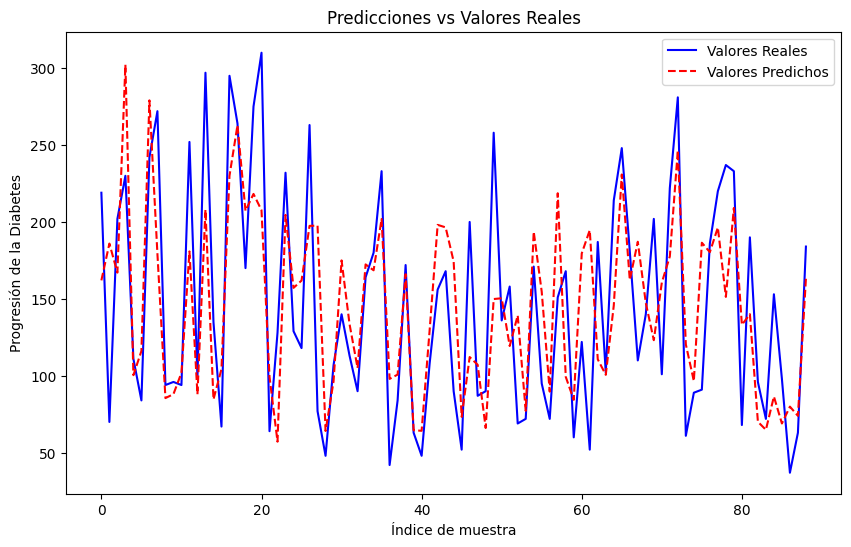

In [8]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores Reales', color='blue')
plt.plot(y_pred, label='Valores Predichos', color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice de muestra')
plt.ylabel('Progresión de la Diabetes')
plt.legend()
plt.show()

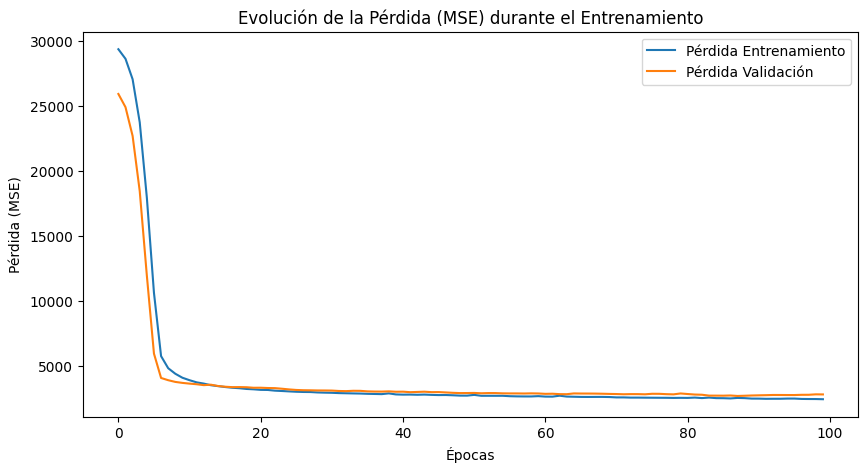

In [6]:
# Graficar la pérdida (MSE) durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Evolución de la Pérdida (MSE) durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()